<a href="https://www.kaggle.com/code/game1g/us-cancer-cdc-wonder?scriptVersionId=225729666" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# 導入必要的套件
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 正確檢查版本號
print(f"Python version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")  
print(f"Seaborn version: {sns.__version__}")

Python version: 2.2.3
NumPy version: 1.26.4
Matplotlib version: 3.7.5
Seaborn version: 0.12.2


# 下載數據

In [2]:
'''
訪問 CDC WONDER 網站：
打開瀏覽器訪問：https://wonder.cdc.gov/cancermort-v2021.html
點擊 "I Agree" 接受使用條款

設置查詢參數：

第一區塊 - 組織結果：
勾選 "Year"
勾選 "State"
勾選 "Cancer Sites"

第二區塊 - 度量指標：
勾選 "Age-Adjusted Rates"

第三區塊 - 時間範圍：
在下拉選單中選擇 2015 到 2021 年

第四區塊 - 地理位置：
選擇 "All States"

第五區塊 - 癌症類型：
找到並展開 "Male and Female breast"

獲取數據
點擊頁面底部的 "Send" 按鈕
在結果頁面點擊 "Export"
選擇 "CSV" 格式
儲存文件（命名為 'breast_cancer_mortality_2015_2021'）'''

'\n訪問 CDC WONDER 網站：\n打開瀏覽器訪問：https://wonder.cdc.gov/cancermort-v2021.html\n點擊 "I Agree" 接受使用條款\n\n設置查詢參數：\n\n第一區塊 - 組織結果：\n勾選 "Year"\n勾選 "State"\n勾選 "Cancer Sites"\n\n第二區塊 - 度量指標：\n勾選 "Age-Adjusted Rates"\n\n第三區塊 - 時間範圍：\n在下拉選單中選擇 2015 到 2021 年\n\n第四區塊 - 地理位置：\n選擇 "All States"\n\n第五區塊 - 癌症類型：\n找到並展開 "Male and Female breast"\n\n獲取數據\n點擊頁面底部的 "Send" 按鈕\n在結果頁面點擊 "Export"\n選擇 "CSV" 格式\n儲存文件（命名為 \'breast_cancer_mortality_2015_2021\'）'

數據載入成功！
資料筆數：357

基本統計資訊：
--------------------------------------------------
        count   mean   std  min   max
Year                                 
2015.0     51  11.35  1.13  9.4  16.4
2016.0     51  11.11  1.19  7.3  13.4
2017.0     51  10.99  1.34  8.2  14.4
2018.0     51  10.95  1.41  8.2  15.8
2019.0     51  10.77  1.18  7.8  14.8
2020.0     51  10.54  1.26  7.7  14.2
2021.0     51  10.49  1.24  8.1  13.6


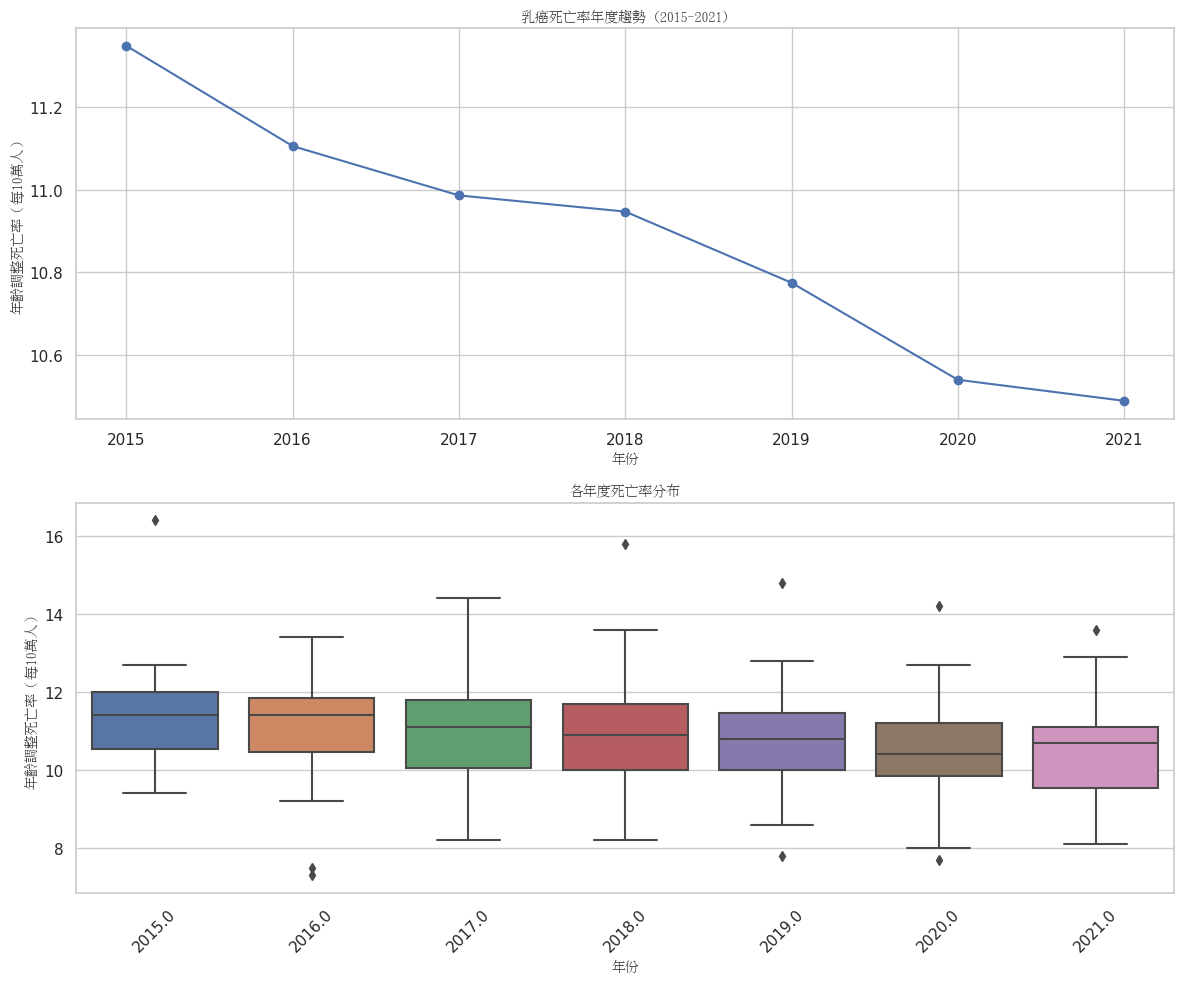


死亡率最高的 10 個州：
                       mean   std  count
State                                   
District of Columbia  14.14  1.68      7
Mississippi           13.26  0.87      7
Oklahoma              12.50  0.54      7
Louisiana             12.49  0.42      7
Tennessee             12.11  0.50      7
Georgia               11.94  0.48      7
South Carolina        11.94  0.63      7
Ohio                  11.83  0.60      7
Kentucky              11.83  0.63      7
Delaware              11.79  0.49      7


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

class BreastCancerDataAnalyzer:
    def __init__(self, file_path, font_path):
        """
        初始化分析器
        """
        self.file_path = file_path
        self.font_path = font_path
        self.df = None
        self.font_properties = FontProperties(fname=font_path)
        
    def load_data(self):
        """
        載入並初步處理 TXT 數據
        """
        try:
            # 讀取 TXT 檔案
            self.df = pd.read_csv(self.file_path, sep='\t')
            
            # 基本數據清理
            self.df = self.df.dropna(subset=['Age-Adjusted Rate'])
            self.df['Year'] = pd.to_numeric(self.df['Year'], errors='coerce')
            
            print("數據載入成功！")
            print(f"資料筆數：{len(self.df)}")
            return True
            
        except Exception as e:
            print(f"載入數據時發生錯誤：{str(e)}")
            return False
    
    def show_basic_stats(self):
        """
        顯示基本統計資訊
        """
        if self.df is None:
            print("請先載入數據！")
            return
            
        print("\n基本統計資訊：")
        print("-" * 50)
        stats = self.df.groupby('Year')['Age-Adjusted Rate'].agg([
            'count', 'mean', 'std', 'min', 'max'
        ]).round(2)
        print(stats)
    
    def plot_trends(self):
        """
        繪製趨勢圖
        """
        if self.df is None:
            print("請先載入數據！")
            return
            
        # 設定繪圖風格
        sns.set(style="whitegrid")
        
        # 創建圖表
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
        
        # 1. 年度趨勢圖
        yearly_means = self.df.groupby('Year')['Age-Adjusted Rate'].mean()
        ax1.plot(yearly_means.index, yearly_means.values, marker='o')
        ax1.set_title('乳癌死亡率年度趨勢 (2015-2021)', fontproperties=self.font_properties)
        ax1.set_xlabel('年份', fontproperties=self.font_properties)
        ax1.set_ylabel('年齡調整死亡率（每10萬人）', fontproperties=self.font_properties)
        ax1.grid(True)
        
        # 2. 州別分布圖
        sns.boxplot(data=self.df, x='Year', y='Age-Adjusted Rate', ax=ax2)
        ax2.set_title('各年度死亡率分布', fontproperties=self.font_properties)
        ax2.set_xlabel('年份', fontproperties=self.font_properties)
        ax2.set_ylabel('年齡調整死亡率（每10萬人）', fontproperties=self.font_properties)
        ax2.tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
    
    def analyze_by_state(self, top_n=10):
        """
        分析各州數據
        """
        if self.df is None:
            print("請先載入數據！")
            return
            
        # 計算各州平均死亡率
        state_stats = self.df.groupby('State')['Age-Adjusted Rate'].agg([
            'mean', 'std', 'count'
        ]).round(2)
        
        # 排序並顯示前N名
        print(f"\n死亡率最高的 {top_n} 個州：")
        print(state_stats.sort_values('mean', ascending=False).head(top_n))

# 使用示例
if __name__ == "__main__":
    file_path = '/kaggle/input/breast-cancer-mortality-2015-2021/breast_cancer_mortality_2015_2021.txt'
    font_path = '/kaggle/input/fontchinese/Open_Data/Fonts/TW-Sung-98_1.ttf'
    analyzer = BreastCancerDataAnalyzer(file_path, font_path)
    if analyzer.load_data():
        analyzer.show_basic_stats()
        analyzer.plot_trends()
        analyzer.analyze_by_state()

數據載入成功！
地理數據載入成功！
數據合併成功！


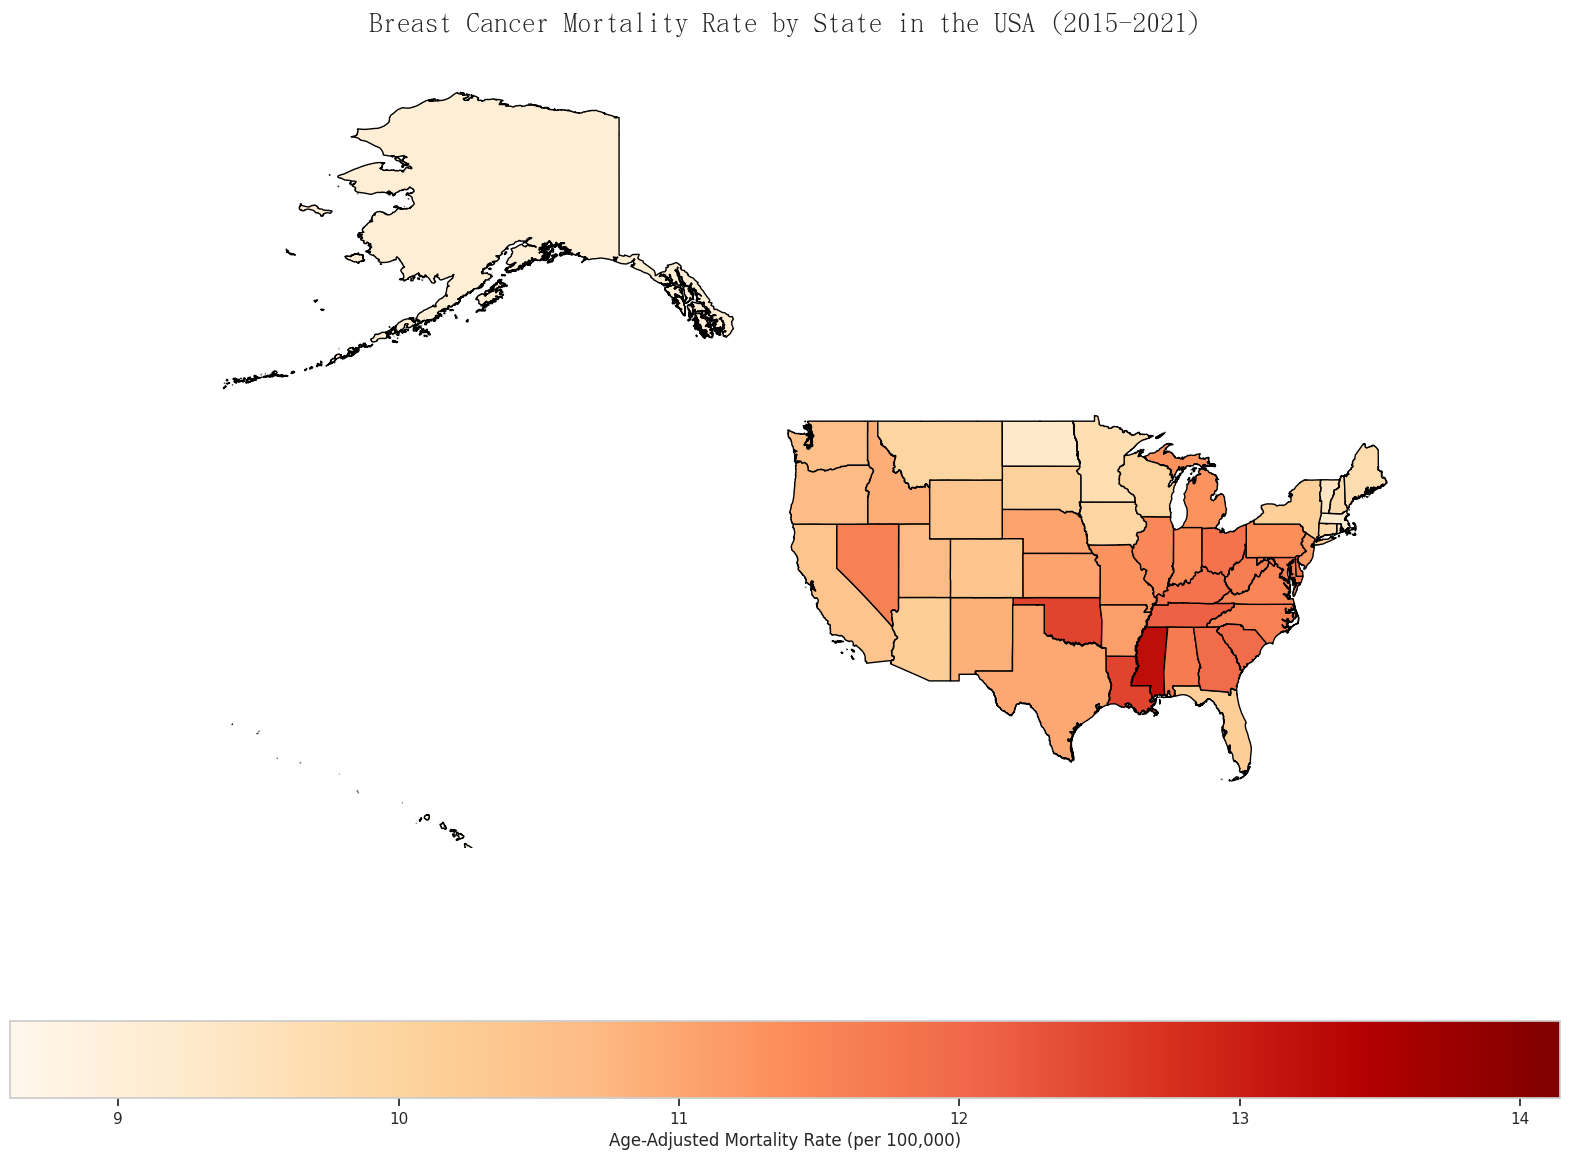

In [4]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties, findSystemFonts

class BreastCancerGeospatialAnalysis:
    def __init__(self, file_path, font_path, shapefile_path):
        self.file_path = file_path
        self.font_properties = FontProperties(fname=font_path)
        self.df = None
        self.shapefile_path = shapefile_path
        self.gdf = None
        
    def load_data(self):
        try:
            # 讀取數據檔案
            self.df = pd.read_csv(self.file_path, sep='\t')
            # 移除缺少 "Age-Adjusted Rate" 的行
            self.df = self.df.dropna(subset=['Age-Adjusted Rate'])
            # 將 "Year" 列轉換為數字
            self.df['Year'] = pd.to_numeric(self.df['Year'], errors='coerce')
            print("數據載入成功！")
            return True
        except Exception as e:
            print(f"載入數據時發生錯誤：{str(e)}")
            return False

    def load_shapefile(self):
        # 檢查 shapefile 是否存在
        if not os.path.exists(self.shapefile_path):
            print(f"Shapefile 文件不存在: {self.shapefile_path}")
            return False
        
        try:
            # 讀取 shapefile
            self.gdf = gpd.read_file(self.shapefile_path)
            print("地理數據載入成功！")
            return True
        except Exception as e:
            print(f"載入地理數據時發生錯誤：{str(e)}")
            return False
    
    def merge_data(self):
        if self.df is None or self.gdf is None:
            print("請先載入數據和地理數據！")
            return
        # 計算各州的平均死亡率
        state_stats = self.df.groupby('State')['Age-Adjusted Rate'].mean().reset_index()
        # 合併地理數據和統計數據
        self.gdf = self.gdf.merge(state_stats, left_on='NAME', right_on='State')
        print("數據合併成功！")
        
    def plot_geospatial(self):
        if self.gdf is None:
            print("請先合併數據！")
            return
        
        # 設置字體屬性
        plt.rcParams['font.family'] = self.font_properties.get_name()
        
        # 創建圖表並設置尺寸
        fig, ax = plt.subplots(1, 1, figsize=(20, 15))
        self.gdf.plot(column='Age-Adjusted Rate', ax=ax, legend=True,
                      legend_kwds={'label': "Age-Adjusted Mortality Rate (per 100,000)",
                                   'orientation': "horizontal"},
                      cmap='OrRd', edgecolor='black')
        ax.set_title('Breast Cancer Mortality Rate by State in the USA (2015-2021)', fontproperties=self.font_properties, fontsize=20)
        ax.set_axis_off()
        
        # 放大美國本土
        ax.set_xlim([-190, -60])
        ax.set_ylim([20, 75])
        
        plt.show()

if __name__ == "__main__":
    file_path = '/kaggle/input/breast-cancer-mortality-2015-2021/breast_cancer_mortality_2015_2021.txt'
    font_path = '/kaggle/input/fontchinese/Open_Data/Fonts/TW-Sung-98_1.ttf'
    shapefile_path = '/kaggle/input/usa-shapefile-census-2018/cb_2018_us_state_500k.shp'
    
    analyzer = BreastCancerGeospatialAnalysis(file_path, font_path, shapefile_path)
    if analyzer.load_data() and analyzer.load_shapefile():
        analyzer.merge_data()
        analyzer.plot_geospatial()